##### Applying Linear Regression on medical_charges.csv File

In [31]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [32]:
medical_df = pd.read_csv('medical.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Linear Regression using a Single Feature

In [33]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
print(non_smoker_df.head())

   age     sex     bmi  children smoker     region      charges
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160


<Axes: title={'center': 'Age vs. Charge'}, xlabel='age', ylabel='charges'>

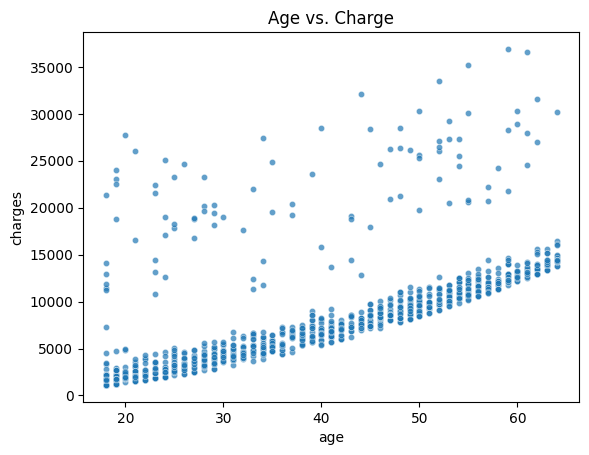

In [34]:
plt.title('Age vs. Charge')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=20)
#alpha : Proportional opacity of the points.
#This is for non smokers only
#This shows Some Linear relationship and can be used to create a linear reg model

In [35]:
#estimate_charges
def estimate_charges(age, w, b):
    return w * age + b

In [36]:
# Random Guess
w = 50
b = 100
estimate_charges(30, w, b)
#Bad guess
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b) 
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Text(0, 0.5, 'Estimated Charges')

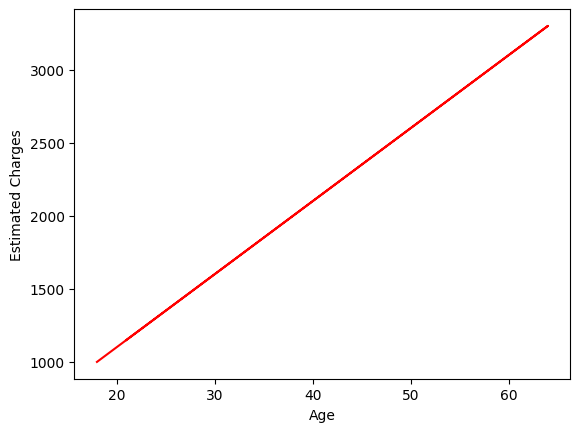

In [37]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

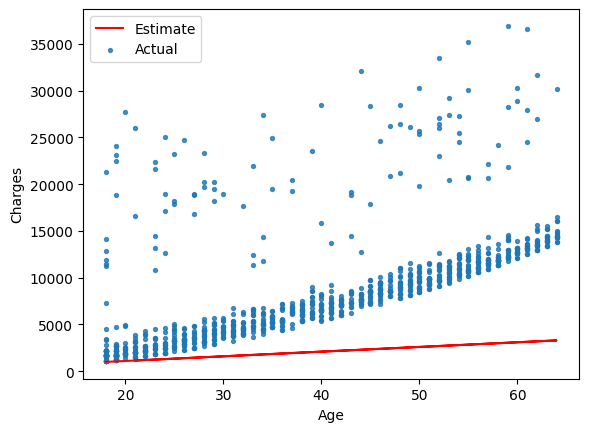

In [38]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r-')
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [39]:
#root_mean_squared_error Loss
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
#trying different parameters and estimating the loss
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    loss = rmse(target, predictions)
    print("RMSE Loss : ", loss)

RMSE Loss :  8044.90886266932
RMSE Loss :  5549.028038013626


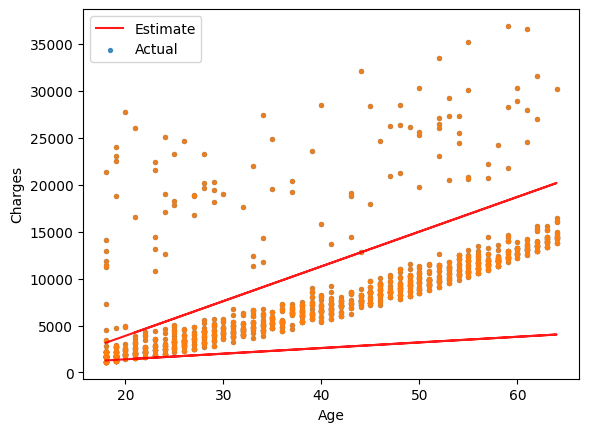

In [40]:
try_parameters(60, 200)
try_parameters(370, -3500)

In [41]:
model = LinearRegression()      #Creating an object
inputs = non_smoker_df[['age']] # feature 'age' will be our input for non_smoker_df 
targets = non_smoker_df.charges
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [42]:
model.fit(inputs, targets)

LinearRegression()

In [43]:
model.predict(np.array([[23],
              [37],
              [61]]))


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [45]:
predictions = model.predict(inputs)
predictions
rmse(targets, predictions)

np.float64(4662.505766636395)

In [46]:
# w
print(model.coef_)
#b
print(model.intercept_)

[267.24891283]
-2091.4205565650864


RMSE Loss :  4662.505766636395


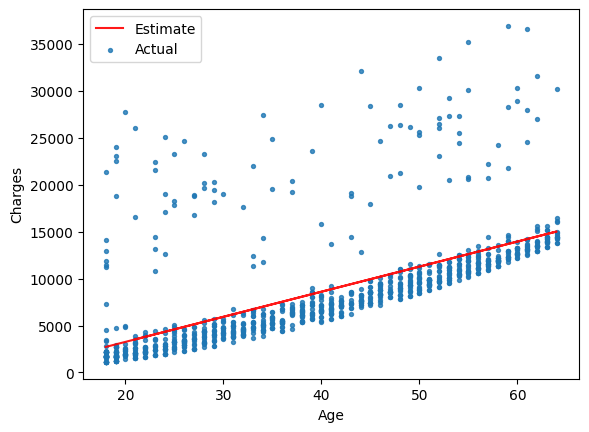

In [48]:
try_parameters(model.coef_, model.intercept_)
#our rmse loss was approx. $4663 which is a pretty bad approximation
#However this linear regression model can act as a baseline model.